## Import the required libraries

In [4]:
import scanpy as sc # Provides tools for single-cell rna seq
from scipy import stats # Provides tools for statistical analysis
import numpy as np # Provides tools for numerical analysis
import pandas as pd # Provides tools for data manipulation and analysis
import matplotlib.pyplot as plt # Provides tools for making plots
import seaborn as sns # Provides tools for making visualizations	

## Load and preprocessing the data

In [5]:
adata = sc.read_10x_mtx("C:/Users/David/Code/SCRA/d4_scRNAseq_data")

# Preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.pct_counts_mt < 20]
sc.pp.normalize_total(adata, target_sum=1e4)


c:\Users\David\miniconda3\envs\UNIRBien\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [6]:
adata 

AnnData object with n_obs × n_vars = 5405 × 16783
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [7]:
adata.var_names

Index(['Xkr4', 'Sox17', 'Mrpl15', 'Lypla1', 'Tcea1', 'Rgs20', 'Atp6v1h',
       'Oprk1', 'Rb1cc1', '4732440D04Rik',
       ...
       'mt-Nd4', 'mt-Nd5', 'mt-Nd6', 'mt-Cytb', 'Vamp7', 'Spry3', 'AC168977.1',
       'PISD', 'DHRSX', 'CAAA01147332.1'],
      dtype='object', length=16783)

In [8]:
i1 = np.where(adata.var_names == 'DHRSX')[0][0]

In [9]:
i2 = np.where(adata.var_names == 'mt-Nd5')[0][0]

In [10]:
data = adata.X.toarray()
data.shape

(5405, 16783)

In [11]:
data[:,i1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [12]:
stats.pearsonr(data[:,i1], data[:,i2])

PearsonRResult(statistic=0.001816212264543906, pvalue=0.8938020760056219)

In [13]:
out = []
for gene in adata.var_names:
    i2 = np.where(adata.var_names == gene)[0][0]
    res = stats.pearsonr(data[:,i1], data[:,i2])
    out.append([gene, res[0], res[1]])

In [14]:
df = pd.DataFrame(out, columns=['gene', 'cor', 'pval'])
df

,gene,cor,pval
0,Xkr4,-0.009380,0.490511
1,Sox17,-0.002654,0.845339
2,Mrpl15,0.006316,0.642494
3,Lypla1,-0.033467,0.013872
4,Tcea1,0.011661,0.391384
...,...,...,...
16778,Spry3,-0.006142,0.651661
16779,AC168977.1,-0.005896,0.664767
16780,PISD,-0.012147,0.371936
16781,DHRSX,1.000000,0.000000


In [15]:
df['bon'] = df.pval * len(df)
df['-log10_p'] = -np.log10(df.pval)
df

c:\Users\David\miniconda3\envs\UNIRBien\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gene,cor,pval,bon,-log10_p
0,Xkr4,-0.009380,0.490511,8232.252919,0.309351
1,Sox17,-0.002654,0.845339,14187.329140,0.072969
2,Mrpl15,0.006316,0.642494,10782.974647,0.192131
3,Lypla1,-0.033467,0.013872,232.820671,1.857848
4,Tcea1,0.011661,0.391384,6568.598613,0.407397
...,...,...,...,...,...
16778,Spry3,-0.006142,0.651661,10936.820154,0.185979
16779,AC168977.1,-0.005896,0.664767,11156.785911,0.177330
16780,PISD,-0.012147,0.371936,6242.204119,0.429532
16781,DHRSX,1.000000,0.000000,0.000000,inf


In [16]:
df = df[df.bon < 0.05].sort_values('bon').reset_index(drop=True)
df

,gene,cor,pval,bon,-log10_p
0,DHRSX,1.000000,0.000000e+00,0.000000e+00,inf
1,Gm11551,0.205540,1.196266e-52,2.007693e-48,51.922172
2,Ttc7,0.141055,2.011769e-25,3.376352e-21,24.696422
3,Apob,0.122171,1.994279e-19,3.346999e-15,18.700214
4,Dnmt3aos,0.111617,1.875443e-16,3.147555e-12,15.726896
5,6430503K07Rik,0.109277,7.873177e-16,1.321355e-11,15.103850
6,Cct6b,0.105037,9.799451e-15,1.644642e-10,14.008798
7,Gm17089,0.103553,2.313861e-14,3.883354e-10,13.635663
8,Slfn8,0.099878,1.844645e-13,3.095868e-09,12.734087
9,Stard6,0.094657,3.100300e-12,5.203233e-08,11.508596


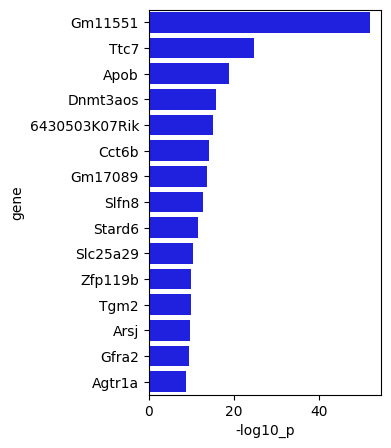

In [17]:
plt.figure(figsize=(3, 5))

ax = sns.barplot(data = df[1:16], x = '-log10_p', y = 'gene', color = 'blue')
plt.show()